In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag
spark = SparkSession.builder.appName("ITC dataset").getOrCreate()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_itc = spark.read.format("csv").option("header","True").option("inferSchema","True").load("/content/sample_data/ITC.csv")

In [11]:
df_itc.show()

+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|               Price|         Adj Close|             Close|              High|              Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|              Ticker|            ITC.NS|            ITC.NS|            ITC.NS|           ITC.NS|            ITC.NS|  ITC.NS|
|                Date|              NULL|              NULL|              NULL|             NULL|              NULL|    NULL|
|1996-01-01 00:00:...| 3.141414165496826|5.5833330154418945| 5.599999904632568|5.533332824707031| 5.550000190734863|  985500|
|1996-01-02 00:00:...| 3.022634267807007| 5.372221946716309| 5.566666126251221|5.288887977600098| 5.466666221618652| 7470000|
|1996-01-03 00:00:...|2.9257354736328125| 5.199999809265137| 5.254444122314453|5.101110935211182| 5.133333206176758|15

In [12]:
cleaned_df = df_itc.dropna()

In [13]:
print(df_itc.columns)

['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [14]:
df_cleaned  = df_itc.filter((col("Price").isNotNull()) & (col("Adj Close").isNotNull()) & (col("Close").isNotNull()) & (col("High").isNotNull())& (col("Low").isNotNull())& (col("Open").isNotNull())& (col("Volume").isNotNull()))

In [15]:
df_cleaned.show()

+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|               Price|         Adj Close|             Close|              High|              Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|              Ticker|            ITC.NS|            ITC.NS|            ITC.NS|           ITC.NS|            ITC.NS|  ITC.NS|
|1996-01-01 00:00:...| 3.141414165496826|5.5833330154418945| 5.599999904632568|5.533332824707031| 5.550000190734863|  985500|
|1996-01-02 00:00:...| 3.022634267807007| 5.372221946716309| 5.566666126251221|5.288887977600098| 5.466666221618652| 7470000|
|1996-01-03 00:00:...|2.9257354736328125| 5.199999809265137| 5.254444122314453|5.101110935211182| 5.133333206176758|15160500|
|1996-01-04 00:00:...| 2.980748414993286|  5.29777717590332| 5.332221984863281|5.144443988800049| 5.199999809265137|12

In [16]:
df_cleaned = spark.createDataFrame(df_cleaned.tail(df_cleaned.count() - 1), schema=df_cleaned.schema)

In [17]:
df_cleaned.show()

+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|               Price|         Adj Close|             Close|              High|              Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|1996-01-01 00:00:...| 3.141414165496826|5.5833330154418945| 5.599999904632568|5.533332824707031| 5.550000190734863|  985500|
|1996-01-02 00:00:...| 3.022634267807007| 5.372221946716309| 5.566666126251221|5.288887977600098| 5.466666221618652| 7470000|
|1996-01-03 00:00:...|2.9257354736328125| 5.199999809265137| 5.254444122314453|5.101110935211182| 5.133333206176758|15160500|
|1996-01-04 00:00:...| 2.980748414993286|  5.29777717590332| 5.332221984863281|5.144443988800049| 5.199999809265137|12397500|
|1996-01-05 00:00:...| 2.926985740661621| 5.202221870422363| 5.277777194976807|5.188888072967529|  5.29777717590332| 5

In [18]:
df_cleaned = df_cleaned.withColumnRenamed("Price", "Date")

In [19]:
df_cleaned.show()

+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|                Date|         Adj Close|             Close|              High|              Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|1996-01-01 00:00:...| 3.141414165496826|5.5833330154418945| 5.599999904632568|5.533332824707031| 5.550000190734863|  985500|
|1996-01-02 00:00:...| 3.022634267807007| 5.372221946716309| 5.566666126251221|5.288887977600098| 5.466666221618652| 7470000|
|1996-01-03 00:00:...|2.9257354736328125| 5.199999809265137| 5.254444122314453|5.101110935211182| 5.133333206176758|15160500|
|1996-01-04 00:00:...| 2.980748414993286|  5.29777717590332| 5.332221984863281|5.144443988800049| 5.199999809265137|12397500|
|1996-01-05 00:00:...| 2.926985740661621| 5.202221870422363| 5.277777194976807|5.188888072967529|  5.29777717590332| 5

In [20]:
df_cleaned = df_cleaned.withColumnRenamed("Adj Close", "Adj_Close")

In [21]:
df_cleaned.show()

+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|                Date|         Adj_Close|             Close|              High|              Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|1996-01-01 00:00:...| 3.141414165496826|5.5833330154418945| 5.599999904632568|5.533332824707031| 5.550000190734863|  985500|
|1996-01-02 00:00:...| 3.022634267807007| 5.372221946716309| 5.566666126251221|5.288887977600098| 5.466666221618652| 7470000|
|1996-01-03 00:00:...|2.9257354736328125| 5.199999809265137| 5.254444122314453|5.101110935211182| 5.133333206176758|15160500|
|1996-01-04 00:00:...| 2.980748414993286|  5.29777717590332| 5.332221984863281|5.144443988800049| 5.199999809265137|12397500|
|1996-01-05 00:00:...| 2.926985740661621| 5.202221870422363| 5.277777194976807|5.188888072967529|  5.29777717590332| 5

In [22]:
df_cleaned.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj_Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [23]:
df_cleaned.count()

7250

In [24]:
df_cleaned.show(7250)

+--------------------+------------------+------------------+------------------+------------------+------------------+----------+
|                Date|         Adj_Close|             Close|              High|               Low|              Open|    Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+----------+
|1996-01-01 00:00:...| 3.141414165496826|5.5833330154418945| 5.599999904632568| 5.533332824707031| 5.550000190734863|    985500|
|1996-01-02 00:00:...| 3.022634267807007| 5.372221946716309| 5.566666126251221| 5.288887977600098| 5.466666221618652|   7470000|
|1996-01-03 00:00:...|2.9257354736328125| 5.199999809265137| 5.254444122314453| 5.101110935211182| 5.133333206176758|  15160500|
|1996-01-04 00:00:...| 2.980748414993286|  5.29777717590332| 5.332221984863281| 5.144443988800049| 5.199999809265137|  12397500|
|1996-01-05 00:00:...| 2.926985740661621| 5.202221870422363| 5.277777194976807| 5.188888072967529

In [27]:
df_cleaned.coalesce(1).write.format("csv").option("header", "true").mode("overwrite").save("/content/sample_data/ITC-DatasetEDA ")

In [29]:
itc = spark.read.format("csv").option("header","True").option("inferSchema","True").load("/content/sample_data/ITC-DatasetEDA /ITC-cleaneddata.csv")

In [30]:
itc.registerTempTable("ITC_Stock")

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [31]:
itc.show()

+-------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|               Date|         Adj_Close|             Close|              High|              Low|              Open|  Volume|
+-------------------+------------------+------------------+------------------+-----------------+------------------+--------+
|1996-01-01 00:00:00| 3.141414165496826|5.5833330154418945| 5.599999904632568|5.533332824707031| 5.550000190734863|  985500|
|1996-01-02 00:00:00| 3.022634267807007| 5.372221946716309| 5.566666126251221|5.288887977600098| 5.466666221618652| 7470000|
|1996-01-03 00:00:00|2.9257354736328125| 5.199999809265137| 5.254444122314453|5.101110935211182| 5.133333206176758|15160500|
|1996-01-04 00:00:00| 2.980748414993286|  5.29777717590332| 5.332221984863281|5.144443988800049| 5.199999809265137|12397500|
|1996-01-05 00:00:00| 2.926985740661621| 5.202221870422363| 5.277777194976807|5.188888072967529|  5.29777717590332| 5008500|


In [32]:
from pyspark.sql.functions import year, month

In [33]:
#2. Day with Highest Adj_Close Price:

df_adjClose = spark.sql("SELECT Date, Adj_Close FROM ITC_Stock ORDER BY Adj_Close DESC LIMIT 1;").show()

+-------------------+---------+
|               Date|Adj_Close|
+-------------------+---------+
|2024-09-26 00:00:00|   522.75|
+-------------------+---------+



In [34]:
#3. Day with Lowest Adj_Close Price:
df_lowAdj = spark.sql("SELECT Date, Adj_Close FROM ITC_Stock ORDER BY Adj_Close ASC LIMIT 1;").show()


+-------------------+-----------------+
|               Date|        Adj_Close|
+-------------------+-----------------+
|1996-01-25 00:00:00|2.353091239929199|
+-------------------+-----------------+



In [35]:
#4. Average Daily Trading Volume:
df_daily = spark.sql("SELECT AVG(Volume) AS Avg_Daily_Volume FROM ITC_Stock;").show()


+-------------------+
|   Avg_Daily_Volume|
+-------------------+
|4.246153672455172E7|
+-------------------+



In [36]:
#5. Day with Highest Volume:
df_day = spark.sql("SELECT Date, Volume, Adj_Close FROM ITC_Stock ORDER BY Volume DESC LIMIT 1;").show()


+-------------------+----------+-----------------+
|               Date|    Volume|        Adj_Close|
+-------------------+----------+-----------------+
|1997-11-21 00:00:00|1294168500|6.839415073394775|
+-------------------+----------+-----------------+



In [37]:
#6. Trends in Monthly/Yearly Average Volume:
df_month = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, AVG(Volume) AS Avg_Volume FROM ITC_Stock GROUP BY YEAR(Date), MONTH(Date) ORDER BY Year, Month;").show()

+----+-----+--------------------+
|Year|Month|          Avg_Volume|
+----+-----+--------------------+
|1996|    1|  7513826.0869565215|
|1996|    2| 1.093157142857143E7|
|1996|    3|1.4744785714285715E7|
|1996|    4| 2.813809090909091E7|
|1996|    5| 2.411413043478261E7|
|1996|    6|        1.45797975E8|
|1996|    7|1.9613602173913044E8|
|1996|    8|1.6143586363636363E8|
|1996|    9|1.3442785714285713E8|
|1996|   10| 2.283296086956522E8|
|1996|   11|           3.44253E8|
|1996|   12|2.1778527272727272E8|
|1997|    1|3.9326380434782606E8|
|1997|    2|         3.7747395E8|
|1997|    3|2.9785821428571427E8|
|1997|    4| 2.393220681818182E8|
|1997|    5|3.2235954545454544E8|
|1997|    6| 3.969730714285714E8|
|1997|    7| 3.128779565217391E8|
|1997|    8|4.1041328571428573E8|
+----+-----+--------------------+
only showing top 20 rows



In [38]:
#7. Correlation Between Volume and Daily Adj_Close Change:
df_vol=spark.sql("WITH DailyChanges AS (SELECT Date, Volume, Adj_Close, LAG(Adj_Close) OVER (ORDER BY Date) AS Prev_Adj_Close FROM ITC_Stock) SELECT CORR(Volume, Adj_Close - Prev_Adj_Close) AS Volume_AdjClose_Correlation FROM DailyChanges;").show()

+---------------------------+
|Volume_AdjClose_Correlation|
+---------------------------+
|       0.002751487864147677|
+---------------------------+



In [39]:
#8. Days with Adj_Close > Open:
df_open = spark.sql("SELECT COUNT(*) AS Days_AdjClose_Higher FROM ITC_Stock WHERE Adj_Close > Open;").show()

+--------------------+
|Days_AdjClose_Higher|
+--------------------+
|                  58|
+--------------------+



In [40]:
#9. Days with Adj_Close < Open:
df_close = spark.sql("SELECT COUNT(*) AS Days_AdjClose_Lower FROM ITC_Stock WHERE Adj_Close < Open;").show()


+-------------------+
|Days_AdjClose_Lower|
+-------------------+
|               7192|
+-------------------+



In [41]:
#10. Average Daily Volatility:
df_volt = spark.sql("SELECT AVG(High - Low) AS Avg_Daily_Volatility FROM ITC_Stock;").show()


+--------------------+
|Avg_Daily_Volatility|
+--------------------+
|  3.1051107882795663|
+--------------------+



In [42]:
#11. Day with Highest Volatility:

df_highVolt = spark.sql("SELECT Date, High, Low, (High - Low) AS Volatility FROM ITC_Stock ORDER BY Volatility DESC LIMIT 1;").show()

+-------------------+-----------------+-----------------+------------------+
|               Date|             High|              Low|        Volatility|
+-------------------+-----------------+-----------------+------------------+
|2012-10-05 00:00:00|186.6666717529297|146.8333282470703|39.833343505859375|
+-------------------+-----------------+-----------------+------------------+



In [43]:
#12. Average Monthly Returns:
df_monthly = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, (MAX(Adj_Close) - MIN(Adj_Close)) / MIN(Adj_Close) * 100 AS Monthly_Return FROM ITC_Stock GROUP BY YEAR(Date), MONTH(Date) ORDER BY Monthly_Return desc;").show()

+----+-----+------------------+
|Year|Month|    Monthly_Return|
+----+-----+------------------+
|2000|    4|55.179100200106724|
|2000|    2| 48.10924948752774|
|2000|    5|42.048651526619544|
|1996|    2|34.784608994187806|
|1996|    1| 33.50158770687304|
|2020|    3| 32.63157356473628|
|2009|    7|32.596159744528634|
|2000|    1| 32.16558800635473|
|2004|    5|29.700832563068598|
|2001|    9|29.616200369713912|
|2008|   10|29.127532735274315|
|1997|    1|28.511293794321475|
|2000|    3|27.193317262178496|
|1996|   12| 26.84694235828146|
|1999|    9| 26.60675133503279|
|2006|    5|26.602166613670008|
|2008|    1|  26.4625145527437|
|1999|   10| 25.29183515859365|
|1996|    3|25.277598615563313|
|2006|    6|24.717927488362896|
+----+-----+------------------+
only showing top 20 rows



In [44]:
#13. Performance by Month/Quarter:
df_quat = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, QUARTER(Date) AS Quarter, AVG(Adj_Close) AS Avg_Adj_Close, AVG(High - Low) AS Avg_Volatility FROM ITC_Stock GROUP BY YEAR(Date), MONTH(Date), QUARTER(Date) ORDER BY Year, Month;").show()


+----+-----+-------+------------------+-------------------+
|Year|Month|Quarter|     Avg_Adj_Close|     Avg_Volatility|
+----+-----+-------+------------------+-------------------+
|1996|    1|      1|2.7391936260720957| 0.1687923307004182|
|1996|    2|      1| 3.344977299372355|0.30597868419828866|
|1996|    3|      1|2.9963182040623257|0.20074081420898438|
|1996|    4|      2| 3.217342485081066|0.18924240632490677|
|1996|    5|      2| 3.416021357411924|0.18449287829191788|
|1996|    6|      2| 3.787795436382294| 0.2584445714950562|
|1996|    7|      3| 3.859507716220358|0.21874404990154764|
|1996|    8|      3| 3.731871106407859|0.16676757552407004|
|1996|    9|      3| 3.715207951409476|0.16492055711292086|
|1996|   10|      4|3.9383666722670845| 0.2304830965788468|
|1996|   11|      4| 3.429023095539638| 0.2589418093363444|
|1996|   12|      4| 3.686891035600142| 0.2260606505654075|
|1997|    1|      1| 4.706972370976987| 0.3835264910822329|
|1997|    2|      1| 5.082175517082215| 

In [45]:
#14. Average Adj_Close Price Per Year:
df_adjClose = spark.sql("SELECT YEAR(Date) AS Year, AVG(Adj_Close) AS Avg_Adj_Close FROM ITC_Stock GROUP BY YEAR(Date) ORDER BY Year;").show()


+----+------------------+
|Year|     Avg_Adj_Close|
+----+------------------+
|1996|3.4880432199885827|
|1997| 6.201684644852562|
|1998| 8.625534572820554|
|1999|11.486956183481034|
|2000| 9.768292276675885|
|2001| 9.838816909497725|
|2002|  8.79970424294015|
|2003|10.168513008264394|
|2004|14.727629360785851|
|2005| 22.97384425354004|
|2006|  37.9507838183569|
|2007|36.903169424303115|
|2008| 42.63115050153034|
|2009|48.239104047233674|
|2010| 68.92586451721192|
|2011| 88.71289515301464|
|2012|117.71167811179647|
|2013| 154.4456720044536|
|2014|170.12515690287606|
|2015|166.68887614428513|
+----+------------------+
only showing top 20 rows



In [46]:
#15. Stock Behavior During Pandemic (2020–2021):
df_pand = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, AVG(Adj_Close) AS Avg_Adj_Close, AVG(High - Low) AS Avg_Volatility, AVG(Volume) AS Avg_Volume FROM ITC_Stock WHERE YEAR(Date) BETWEEN 2020 AND 2021 GROUP BY YEAR(Date), MONTH(Date) ORDER BY Year, Month;").show()



+----+-----+------------------+------------------+--------------------+
|Year|Month|     Avg_Adj_Close|    Avg_Volatility|          Avg_Volume|
+----+-----+------------------+------------------+--------------------+
|2020|    1|192.64605712890625| 3.156520014223845|   9550196.260869564|
|2020|    2|168.25275862844367| 5.228944477282073| 2.180856436842105E7|
|2020|    3|135.24083382742745|11.469045729864211|4.2166007952380955E7|
|2020|    4|146.88966623942056| 6.888888888888889|         2.9760753E7|
|2020|    5| 141.0806033485814| 7.492103978207237| 2.917873552631579E7|
|2020|    6| 156.7386613325639|  6.84545274214311| 3.473656995454545E7|
|2020|    7| 166.9044952392578| 4.473912114682405|2.6269464260869566E7|
|2020|    8|167.64336286272322| 3.971427554175967| 2.703056438095238E7|
|2020|    9|153.69697154651988| 4.306819568980824|2.9377036681818184E7|
|2020|   10|143.19917951311385| 3.242856706891741| 2.512248019047619E7|
|2020|   11| 156.6148712158203| 4.694998931884766|       3.31564

In [47]:
#16. Volume and Volatility During Major Events:
df_volatility = spark.sql("SELECT Date, Adj_Close, Volume, (High - Low) AS Volatility FROM ITC_Stock WHERE YEAR(Date) BETWEEN 2020 AND 2021 ORDER BY Date;").show()


+-------------------+------------------+--------+------------------+
|               Date|         Adj_Close|  Volume|        Volatility|
+-------------------+------------------+--------+------------------+
|2020-01-01 00:00:00| 193.0037841796875| 4208837|               1.5|
|2020-01-02 00:00:00|194.42233276367188| 8402979|2.8499908447265625|
|2020-01-03 00:00:00| 193.3280029296875| 9284478|               3.0|
|2020-01-06 00:00:00|190.57200622558594| 7636617|3.3000030517578125|
|2020-01-07 00:00:00|190.77462768554688| 8416741|  3.29998779296875|
|2020-01-08 00:00:00|189.84243774414062| 7043211|2.5500030517578125|
|2020-01-09 00:00:00|191.13938903808594| 9452653|1.5500030517578125|
|2020-01-10 00:00:00| 192.9227294921875| 9973746|1.9499969482421875|
|2020-01-13 00:00:00| 193.9359588623047|12243639|              2.25|
|2020-01-14 00:00:00|197.17835998535156|11843444|               5.5|
|2020-01-15 00:00:00|196.48936462402344| 5476729| 1.899993896484375|
|2020-01-16 00:00:00|195.151885986

In [48]:
#17. Standard Deviation of Daily Adj_Close Prices:
df_std = spark.sql("SELECT STDDEV(Adj_Close) AS StdDev_Adj_Close FROM ITC_Stock;").show()


+------------------+
|  StdDev_Adj_Close|
+------------------+
|117.27159975593337|
+------------------+



In [49]:
#18. Average Percentage Change Between Open and Adj_Close:
df_perc = spark.sql("SELECT AVG((Adj_Close - Open) / Open * 100) AS Avg_Percentage_Change FROM ITC_Stock;").show()

+---------------------+
|Avg_Percentage_Change|
+---------------------+
|   -29.47463859099284|
+---------------------+



In [50]:
#19. Bullish vs Bearish Days:
df_bull = spark.sql("SELECT COUNT(CASE WHEN Adj_Close > Open THEN 1 END) AS Bullish_Days, COUNT(CASE WHEN Adj_Close < Open THEN 1 END) AS Bearish_Days FROM ITC_Stock;").show()

+------------+------------+
|Bullish_Days|Bearish_Days|
+------------+------------+
|          58|        7192|
+------------+------------+



In [51]:
#20. Best Months or Quarters for Investment:

df_Months = spark.sql("SELECT MONTH(Date) AS Month, QUARTER(Date) AS Quarter, AVG(Adj_Close) AS Avg_Adj_Close FROM ITC_Stock GROUP BY MONTH(Date), QUARTER(Date) ORDER BY Avg_Adj_Close DESC;").show()


+-----+-------+------------------+
|Month|Quarter|     Avg_Adj_Close|
+-----+-------+------------------+
|    9|      3| 120.5831273424487|
|    8|      3|119.01913210329398|
|   10|      4| 118.6634569904442|
|    7|      3|118.55595507979953|
|    6|      2|112.88445444037387|
|   11|      4|112.31418439596634|
|    5|      2|111.74245358929397|
|   12|      4|107.08156923994274|
|    4|      2|106.24760405750541|
|    2|      1|106.06663894197216|
|    1|      1|105.75192029937621|
|    3|      1|102.93219456160364|
+-----+-------+------------------+



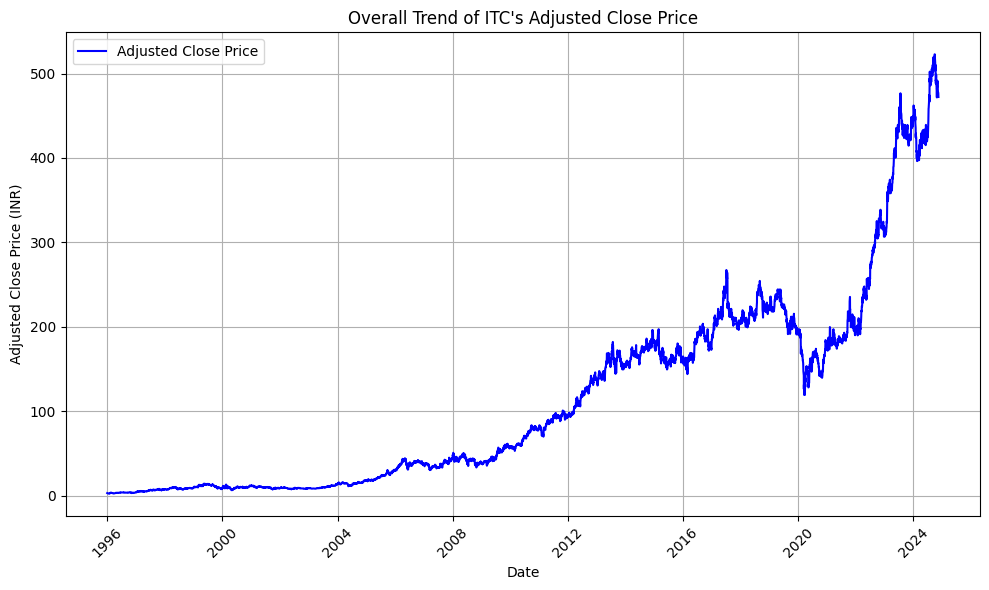

<ipython-input-53-b6fa1e755e46>:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['Date'].dt.to_period('M')


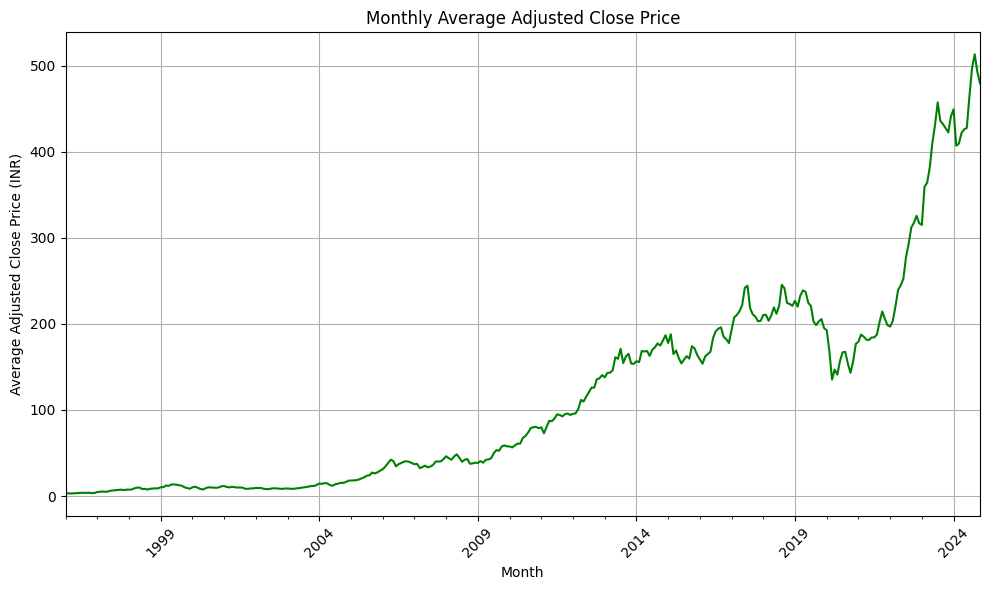

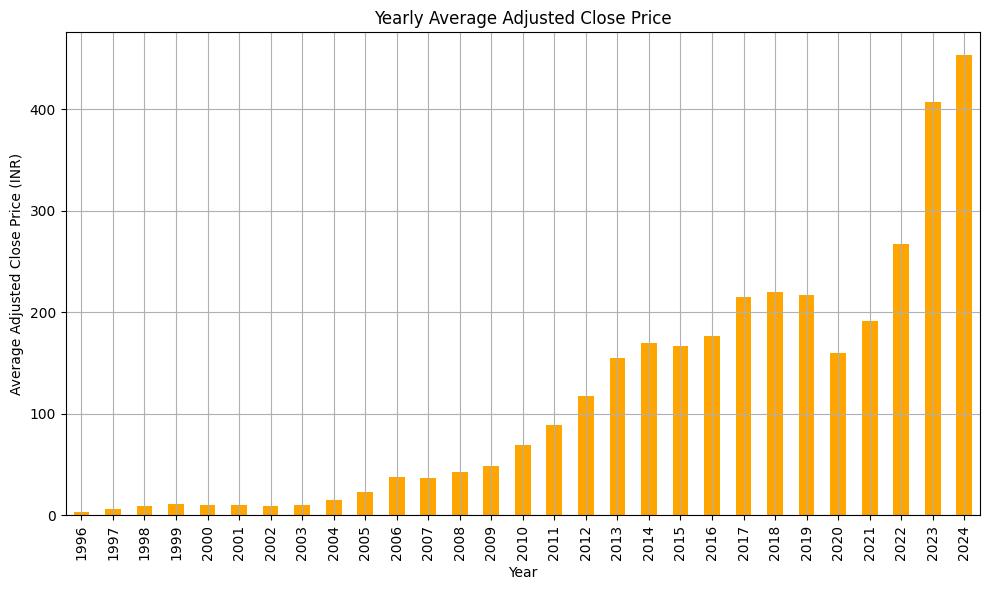

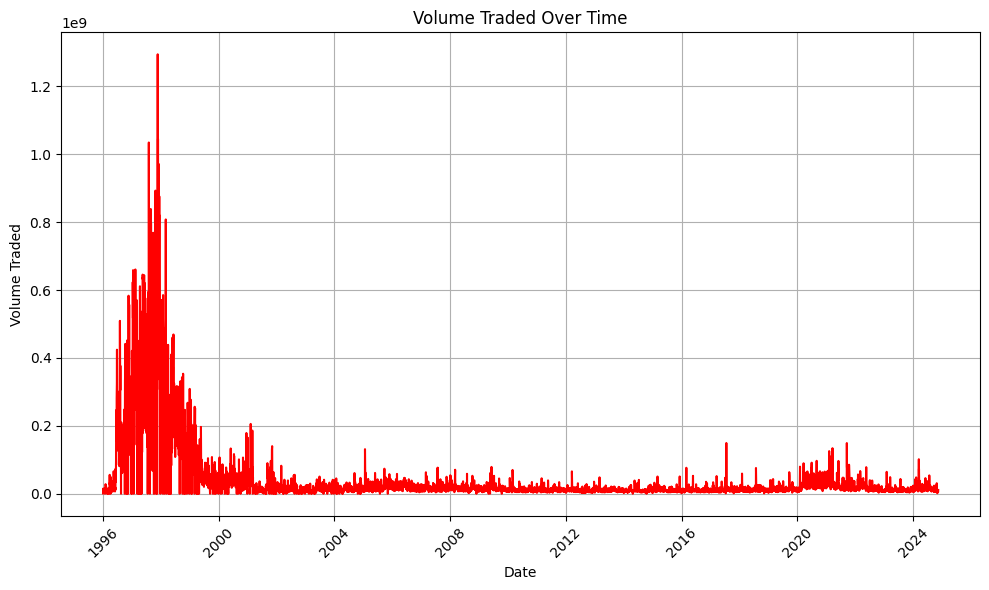

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/content/sample_data/ITC-DatasetEDA /ITC-cleaneddata.csv'
df = pd.read_csv(file_path)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the overall trend of Adjusted Close prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj_Close'], label='Adjusted Close Price', color='blue')
plt.title('Overall Trend of ITC\'s Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (INR)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the monthly average of Adjusted Close Price
df['Year-Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Year-Month')['Adj_Close'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', color='green')
plt.title('Monthly Average Adjusted Close Price')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the yearly average of Adjusted Close Price
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Adj_Close'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='orange')
plt.title('Yearly Average Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the volume over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='red')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
df_loss = spark.sql("SELECT   Date , Close , Open , High , Low , Adj_close FROM ITC_STOCK WHERE YEAR(Date) BETWEEN 2008 AND 2009;").show()

+-------------------+-----------------+-----------------+-----------------+------------------+------------------+
|               Date|            Close|             Open|             High|               Low|         Adj_close|
+-------------------+-----------------+-----------------+-----------------+------------------+------------------+
|2008-01-01 00:00:00|72.53333282470703|70.66666412353516|73.61666870117188| 70.03333282470703| 47.81211853027344|
|2008-01-02 00:00:00|73.69999694824219|73.30000305175781|75.80000305175781| 71.43333435058594| 48.58115005493164|
|2008-01-03 00:00:00|71.48332977294922|73.33333587646484|73.66666412353516| 70.68333435058594|  47.1199836730957|
|2008-01-04 00:00:00|73.11666870117188|71.66666412353516| 73.4000015258789| 71.05000305175781|48.196632385253906|
|2008-01-07 00:00:00| 77.0999984741211|70.56666564941406|78.33333587646484| 70.56666564941406|50.822330474853516|
|2008-01-08 00:00:00|             77.0|77.93333435058594|79.80000305175781| 74.699996948

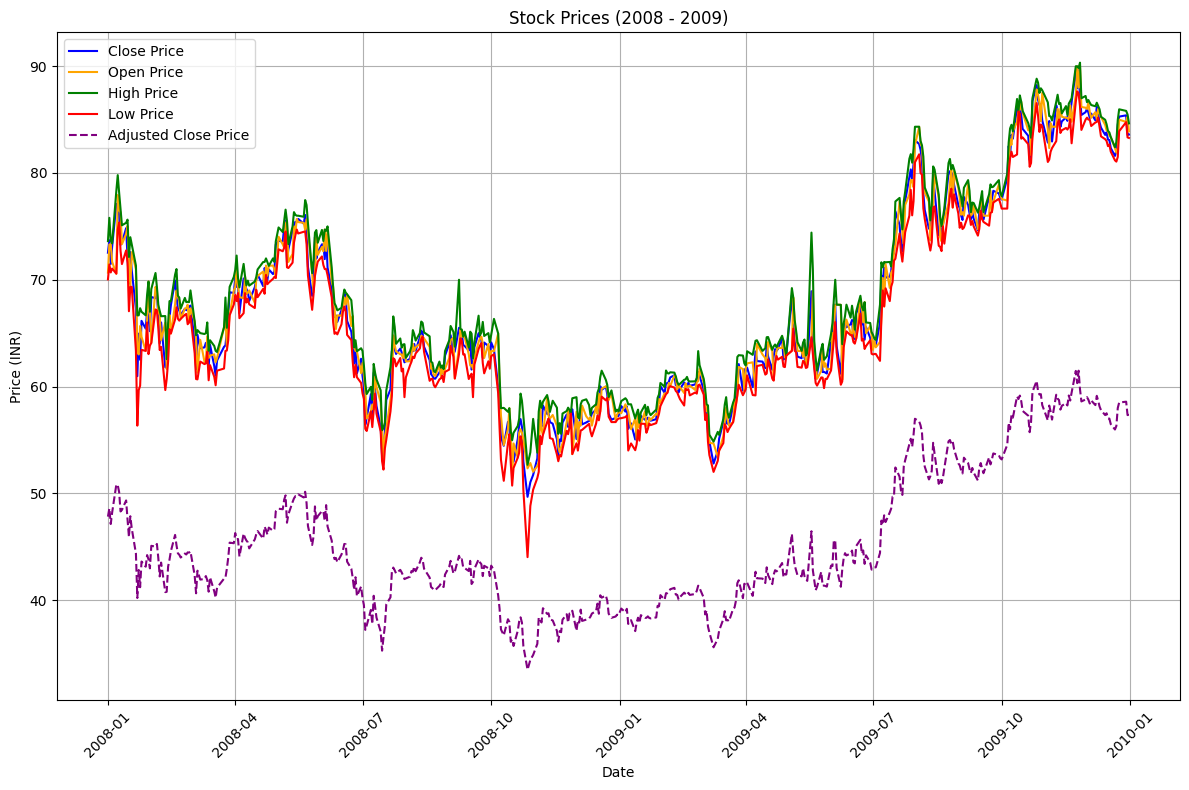

In [55]:
# Reimport necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data
file_path = '/content/sample_data/ITC-DatasetEDA /ITC-cleaneddata.csv'
df = pd.read_csv(file_path)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the years 2008 to 2009
filtered_df = df[(df['Date'].dt.year >= 2008) & (df['Date'].dt.year <= 2009)]

# Plotting Open, Close, High, Low, and Adjusted Close prices
plt.figure(figsize=(12, 8))

# Plot Close prices
plt.plot(filtered_df['Date'], filtered_df['Close'], label='Close Price', color='blue')

# Plot Open prices
plt.plot(filtered_df['Date'], filtered_df['Open'], label='Open Price', color='orange')

# Plot High prices
plt.plot(filtered_df['Date'], filtered_df['High'], label='High Price', color='green')

# Plot Low prices
plt.plot(filtered_df['Date'], filtered_df['Low'], label='Low Price', color='red')

# Plot Adjusted Close prices
plt.plot(filtered_df['Date'], filtered_df['Adj_Close'], label='Adjusted Close Price', color='purple', linestyle='--')

# Add titles and labels
plt.title('Stock Prices (2008 - 2009)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
